In [529]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [531]:
df = pd.read_csv('insurance_claim.csv')

In [533]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [535]:
df.replace('?', np.nan, inplace = True)

In [537]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [541]:
# missing values
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [543]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [545]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [547]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [549]:
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [551]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [553]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [555]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [557]:
df.drop(columns = [ 'total_claim_amount'], inplace = True, axis = 1)

In [559]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,20,1,NO,0,1,NO,1300,650,4550,N


In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [563]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [565]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [567]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO


In [569]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [571]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [573]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [575]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [577]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [579]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [581]:
X.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,48,1000,0,53300,0,5,1,1,2,...,False,True,False,False,False,False,False,True,True,True
1,228,42,2000,5000000,0,0,8,1,0,0,...,True,False,True,False,False,False,False,True,False,False
2,134,29,2000,5000000,35100,0,7,3,2,3,...,True,False,True,False,False,False,False,True,False,False
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,False,False,False,False,False,False,False,True,False,False
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,True,False,True,False,False,False,False,False,False,False


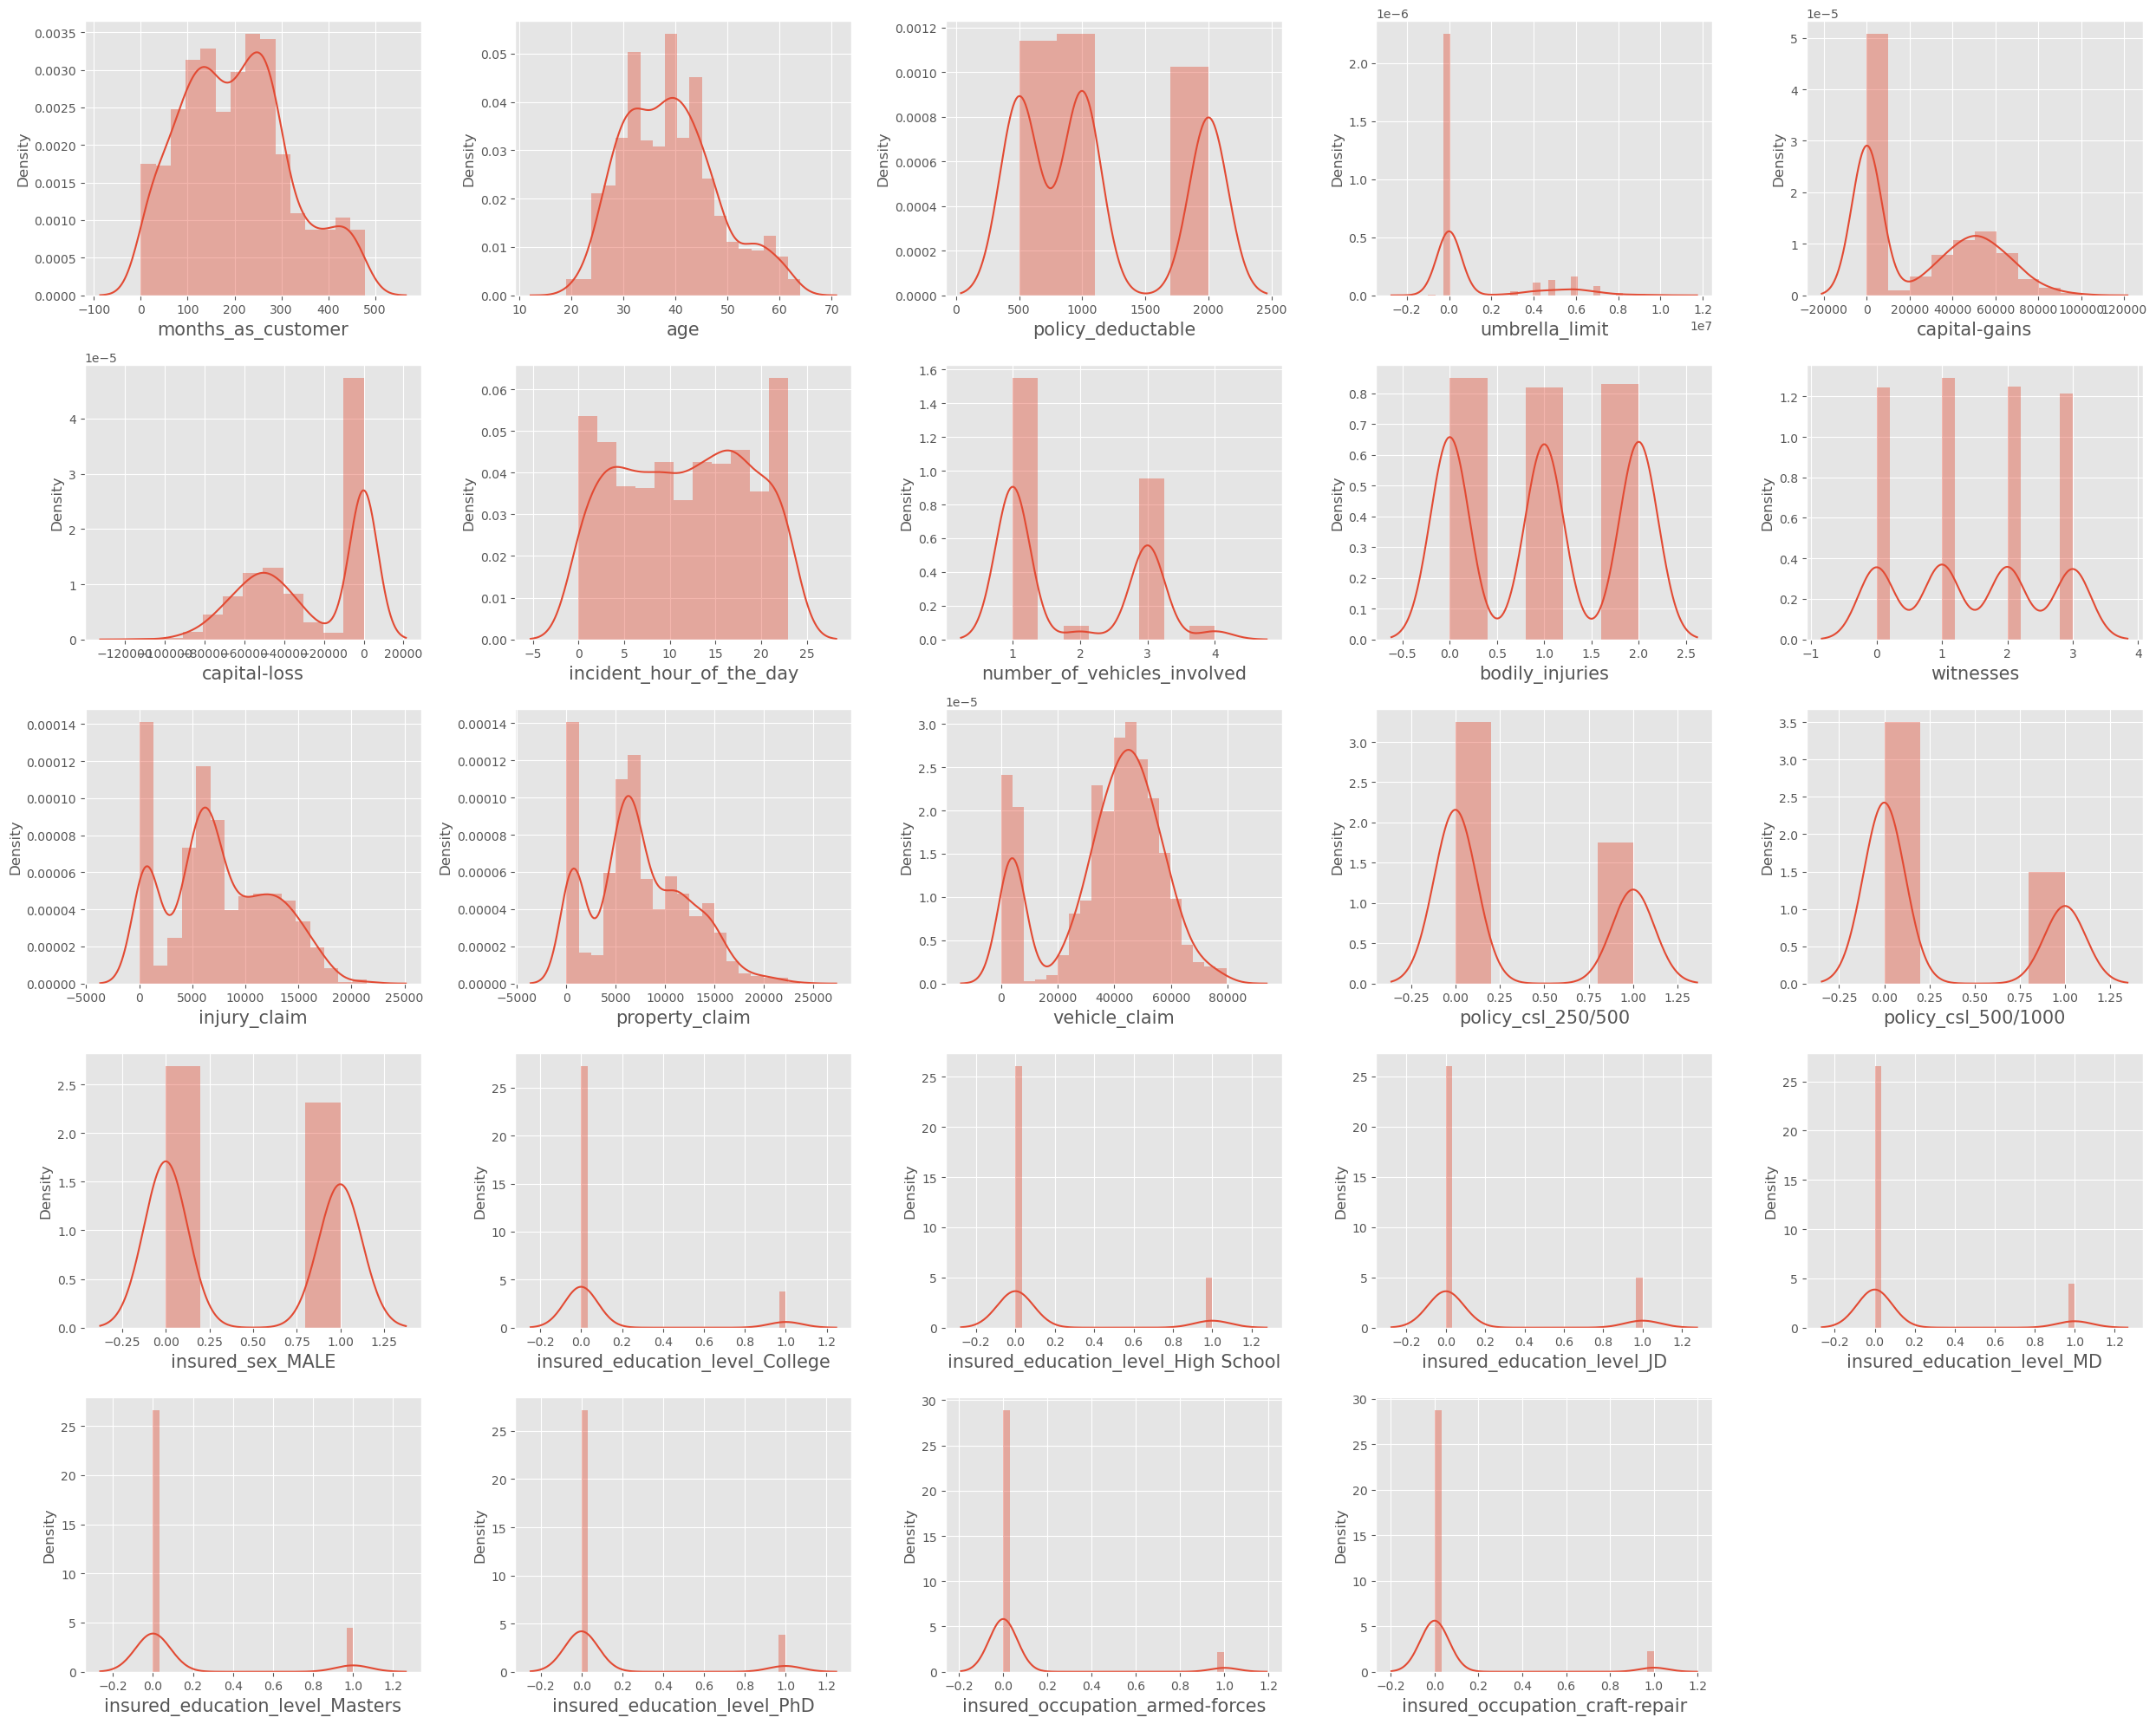

In [583]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

**check for outliers.**

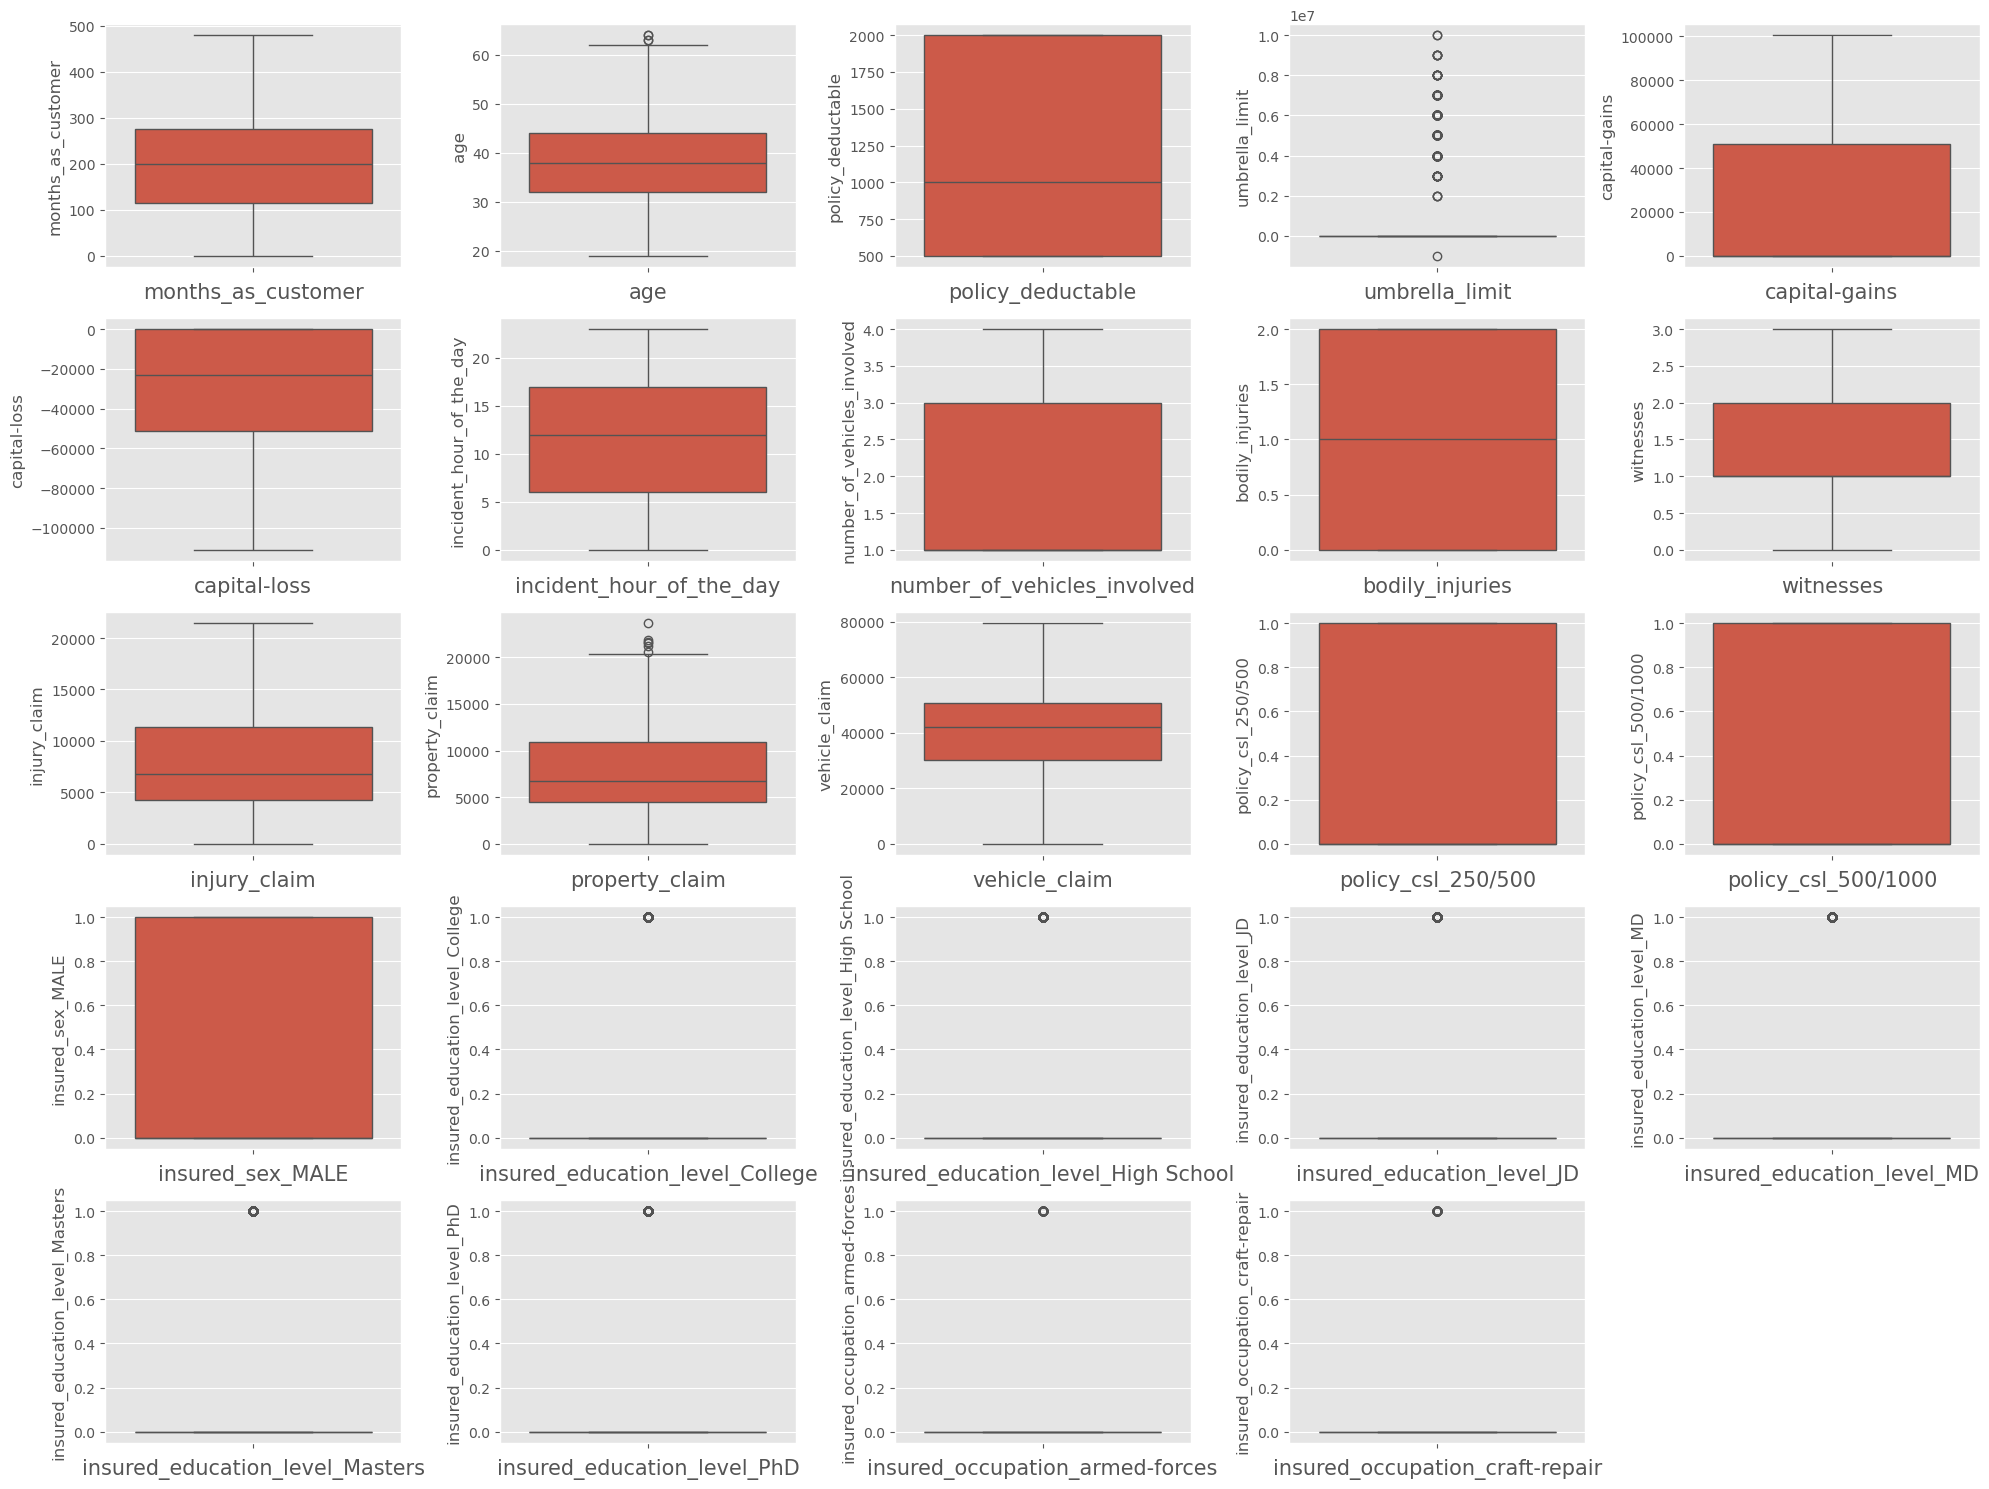

In [585]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [587]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [588]:
X_train.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
350,250,43,1000,0,47900,-73400,22,1,1,3,...,False,True,True,False,False,False,True,False,True,False
828,105,28,500,0,0,0,12,3,2,2,...,True,False,False,False,False,True,False,False,False,False
259,134,30,2000,0,0,0,19,3,0,2,...,True,False,False,False,False,True,False,False,False,True
140,211,35,2000,0,76000,0,2,1,0,1,...,True,False,False,True,False,False,False,True,True,False
136,200,40,1000,0,45300,-20400,9,1,0,0,...,True,False,True,False,False,False,False,True,False,False


In [589]:
num_df = X_train[['months_as_customer','age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [590]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [591]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
350,0.369117,0.416681,-0.221938,-0.469697,0.810023,-1.700883,1.464224,-0.844989,0.021004,1.384443,1.123077,1.172496,0.064718
828,-0.877629,-1.214944,-1.037886,-0.469697,-0.893909,0.936357,0.027583,1.111004,1.232762,0.479973,0.942697,-0.269677,0.245219
259,-0.628280,-0.997394,1.409959,-0.469697,-0.893909,0.936357,1.033232,1.111004,-1.190754,0.479973,-0.449100,-0.423676,-0.028973
140,0.033785,-0.453519,1.409959,-0.469697,1.809616,0.936357,-1.409057,-0.844989,-1.190754,-0.424498,0.401556,-0.544377,0.006492
136,-0.060795,0.090356,-0.221938,-0.469697,0.717534,0.203391,-0.403409,-0.844989,-1.190754,-1.328969,-1.453490,-1.443395,-1.844568


In [592]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [593]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [594]:
X_train.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
350,0.369117,0.416681,-0.221938,-0.469697,0.810023,-1.700883,1.464224,-0.844989,0.021004,1.384443,...,False,True,True,False,False,False,True,False,True,False
828,-0.877629,-1.214944,-1.037886,-0.469697,-0.893909,0.936357,0.027583,1.111004,1.232762,0.479973,...,True,False,False,False,False,True,False,False,False,False
259,-0.628280,-0.997394,1.409959,-0.469697,-0.893909,0.936357,1.033232,1.111004,-1.190754,0.479973,...,True,False,False,False,False,True,False,False,False,True
140,0.033785,-0.453519,1.409959,-0.469697,1.809616,0.936357,-1.409057,-0.844989,-1.190754,-0.424498,...,True,False,False,True,False,False,False,True,True,False
136,-0.060795,0.090356,-0.221938,-0.469697,0.717534,0.203391,-0.403409,-0.844989,-1.190754,-1.328969,...,True,False,True,False,False,False,False,True,False,False


In [596]:
X_train.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv'

### Suport Vector Classifier

In [598]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [599]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8293333333333334
Test accuracy of Support Vector Classifier is : 0.724
[[181   0]
 [ 69   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       181
           Y       0.00      0.00      0.00        69

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.61       250



### KNN

In [601]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [602]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7626666666666667
Test accuracy of KNN is : 0.724
[[181   0]
 [ 69   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       181
           Y       0.00      0.00      0.00        69

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.61       250



### Decision Tree Classifier

In [606]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [615]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.684
[[126  55]
 [ 24  45]]
              precision    recall  f1-score   support

           N       0.84      0.70      0.76       181
           Y       0.45      0.65      0.53        69

    accuracy                           0.68       250
   macro avg       0.65      0.67      0.65       250
weighted avg       0.73      0.68      0.70       250



In [619]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [622]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 3}
0.812


In [624]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [625]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.816
Test accuracy of Decision Tree is : 0.764
[[144  37]
 [ 22  47]]
              precision    recall  f1-score   support

           N       0.87      0.80      0.83       181
           Y       0.56      0.68      0.61        69

    accuracy                           0.76       250
   macro avg       0.71      0.74      0.72       250
weighted avg       0.78      0.76      0.77       250



### RandomForestClassifier

In [627]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [628]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9746666666666667
Test accuracy of Random Forest is : 0.72
[[161  20]
 [ 50  19]]
              precision    recall  f1-score   support

           N       0.76      0.89      0.82       181
           Y       0.49      0.28      0.35        69

    accuracy                           0.72       250
   macro avg       0.63      0.58      0.59       250
weighted avg       0.69      0.72      0.69       250



### AdaBoostClassifier

In [630]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [631]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}
0.7826666666666668


In [632]:
# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [633]:
# accuracy_score, confusion_matrix and classification_report

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8226666666666667
Test accuracy of Ada Boost is : 0.748
[[174   7]
 [ 56  13]]
              precision    recall  f1-score   support

           N       0.76      0.96      0.85       181
           Y       0.65      0.19      0.29        69

    accuracy                           0.75       250
   macro avg       0.70      0.57      0.57       250
weighted avg       0.73      0.75      0.69       250



### GradientBoostingClassifier

In [635]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.932
Test Accuracy of Gradient Boosting Classifier is 0.7 

Confusion Matrix :- 
[[169  12]
 [ 63   6]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.73      0.93      0.82       181
           Y       0.33      0.09      0.14        69

    accuracy                           0.70       250
   macro avg       0.53      0.51      0.48       250
weighted avg       0.62      0.70      0.63       250



### Stochastic Gradient Boosting Classifier

In [641]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.9453333333333334
Test Accuracy of Stochastic Gradient Boosting is 0.708 

Confusion Matrix :- 
[[165  16]
 [ 57  12]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.74      0.91      0.82       181
           Y       0.43      0.17      0.25        69

    accuracy                           0.71       250
   macro avg       0.59      0.54      0.53       250
weighted avg       0.66      0.71      0.66       250



### XGBoost Classifier

In [645]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgb = XGBClassifier()
le = LabelEncoder()
xgb_y_train = le.fit_transform(y_train)
xgb_y_test = le.fit_transform(y_test)

xgb.fit(X_train, xgb_y_train)

y_pred = xgb.predict(X_test)

In [646]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(xgb_y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(xgb_y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(xgb_y_test, y_pred))
print(classification_report(xgb_y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.744
[[161  20]
 [ 44  25]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       181
           1       0.56      0.36      0.44        69

    accuracy                           0.74       250
   macro avg       0.67      0.63      0.64       250
weighted avg       0.72      0.74      0.73       250



In [647]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [648]:
# best estimator 

xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [649]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.8226666666666667
Test accuracy of XgBoost is : 0.748
[[174   7]
 [ 56  13]]
              precision    recall  f1-score   support

           N       0.76      0.96      0.85       181
           Y       0.65      0.19      0.29        69

    accuracy                           0.75       250
   macro avg       0.70      0.57      0.57       250
weighted avg       0.73      0.75      0.69       250



### Voting Classifier

In [651]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

In [652]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.8813333333333333
Test accuracy of Voting Classifier is : 0.728
[[180   1]
 [ 67   2]]
              precision    recall  f1-score   support

           N       0.73      0.99      0.84       181
           Y       0.67      0.03      0.06        69

    accuracy                           0.73       250
   macro avg       0.70      0.51      0.45       250
weighted avg       0.71      0.73      0.62       250



### Model comparison

In [654]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc, sgb_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.764
4,Ada Boost,0.748
7,XgBoost,0.748
8,Voting Classifier,0.728
0,SVC,0.724
1,KNN,0.724
3,Random Forest,0.720
6,SGB,0.708
5,Gradient Boost,0.700


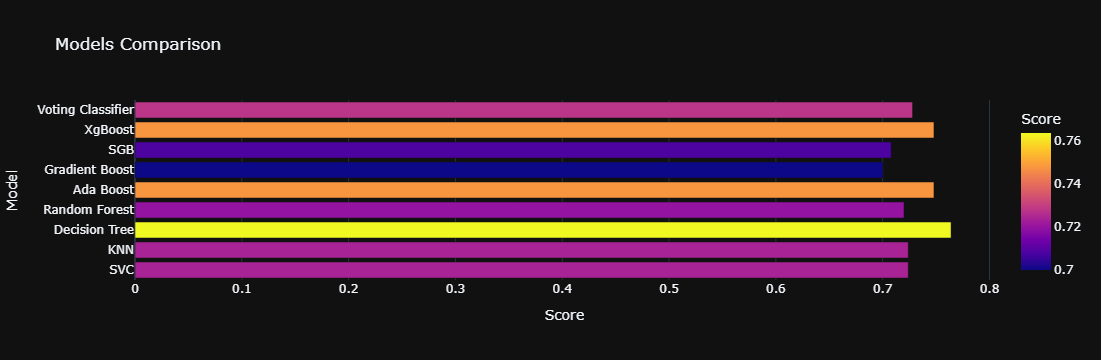

In [655]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [765]:
parsed_data = {
    'months_as_customer': 1,
    'age':20,
    'policy_deductable': 500,
    'umbrella_limit': 1000000,
    'capital-gains': 0,
    'capital-loss': 0,
    'incident_hour_of_the_day': 14,
    'number_of_vehicles_involved': 1,
    'bodily_injuries': 0,
    'witnesses': 0,
    'injury_claim': 20000,
    'property_claim': 15000,
    'vehicle_claim': 20000,
    'policy_csl_250/500': 1,
    'policy_csl_500/1000': 0,
    'insured_sex_MALE': 1,
    'insured_education_level_College': 0,
    'insured_education_level_High School': 1,
    'insured_education_level_JD': 0,
    'insured_education_level_MD': 0,
    'insured_education_level_Masters': 0,
    'insured_education_level_PhD': 0,
    'insured_occupation_armed-forces': 0,
    'insured_occupation_craft-repair': 0,
    'insured_occupation_exec-managerial': 0,
    'insured_occupation_farming-fishing': 0,
    'insured_occupation_handlers-cleaners': 0,
    'insured_occupation_machine-op-inspct': 0,
    'insured_occupation_other-service': 1,
    'insured_occupation_priv-house-serv': 0,
    'insured_occupation_prof-specialty': 0,
    'insured_occupation_protective-serv': 0,
    'insured_occupation_sales': 0,
    'insured_occupation_tech-support': 0,
    'insured_occupation_transport-moving': 0,
    'insured_relationship_not-in-family': 0,
    'insured_relationship_other-relative': 0,
    'insured_relationship_own-child': 0,
    'insured_relationship_unmarried': 0,
    'insured_relationship_wife': 0,
    'incident_type_Parked Car': 0,
    'incident_type_Single Vehicle Collision': 0,
    'incident_type_Vehicle Theft': 0,
    'collision_type_Rear Collision': 1,
    'collision_type_Side Collision': 0,
    'incident_severity_Minor Damage': 0,
    'incident_severity_Total Loss': 0,
    'incident_severity_Trivial Damage': 1,
    'authorities_contacted_Fire': 0,
    'authorities_contacted_Other': 0,
    'authorities_contacted_Police': 0,
    'property_damage_YES': 1,
    'police_report_available_YES': 0
}

parsed_data_1 = {
    'months_as_customer': 1,
    'age':40,
    'policy_deductable': 500,
    'umbrella_limit': 1000000,
    'capital-gains': 0,
    'capital-loss': 0,
    'incident_hour_of_the_day': 14,
    'number_of_vehicles_involved': 1,
    'bodily_injuries': 0,
    'witnesses': 0,
    'injury_claim': 20000,
    'property_claim': 15000,
    'vehicle_claim': 20000,
    'policy_csl_250/500': 1,
    'policy_csl_500/1000': 0,
    'insured_sex_MALE': 1,
    'insured_education_level_College': 0,
    'insured_education_level_High School': 1,
    'insured_education_level_JD': 0,
    'insured_education_level_MD': 0,
    'insured_education_level_Masters': 0,
    'insured_education_level_PhD': 0,
    'insured_occupation_armed-forces': 0,
    'insured_occupation_craft-repair': 0,
    'insured_occupation_exec-managerial': 0,
    'insured_occupation_farming-fishing': 1,
    'insured_occupation_handlers-cleaners': 0,
    'insured_occupation_machine-op-inspct': 0,
    'insured_occupation_other-service': 0,
    'insured_occupation_priv-house-serv': 0,
    'insured_occupation_prof-specialty': 0,
    'insured_occupation_protective-serv': 0,
    'insured_occupation_sales': 0,
    'insured_occupation_tech-support': 0,
    'insured_occupation_transport-moving': 0,
    'insured_relationship_not-in-family': 0,
    'insured_relationship_other-relative': 0,
    'insured_relationship_own-child': 0,
    'insured_relationship_unmarried': 1,
    'insured_relationship_wife': 0,
    'incident_type_Parked Car': 0,
    'incident_type_Single Vehicle Collision': 0,
    'incident_type_Vehicle Theft': 0,
    'collision_type_Rear Collision': 1,
    'collision_type_Side Collision': 0,
    'incident_severity_Minor Damage': 0,
    'incident_severity_Total Loss': 0,
    'incident_severity_Trivial Damage': 1,
    'authorities_contacted_Fire': 0,
    'authorities_contacted_Other': 0,
    'authorities_contacted_Police': 0,
    'property_damage_YES': 1,
    'police_report_available_YES': 0
}


parsed_data_2 = {
    'months_as_customer': 2,
    'age':30,
    'policy_deductable': 1000,
    'umbrella_limit': 2000000,
    'capital-gains': 5000,
    'capital-loss': 1000,
    'incident_hour_of_the_day': 11,
    'number_of_vehicles_involved': 2,
    'bodily_injuries': 1,
    'witnesses': 1,
    'injury_claim': 50000,
    'property_claim': 25000,
    'vehicle_claim': 15000,
    'policy_csl_250/500': 0,
    'policy_csl_500/1000': 1,
    'insured_sex_MALE': 1,
    'insured_education_level_College': 0,
    'insured_education_level_High School': 0,
    'insured_education_level_JD': 0,
    'insured_education_level_MD': 0,
    'insured_education_level_Masters': 1,
    'insured_education_level_PhD': 0,
    'insured_occupation_armed-forces': 0,
    'insured_occupation_craft-repair': 0,
    'insured_occupation_exec-managerial': 0,
    'insured_occupation_farming-fishing': 0,
    'insured_occupation_handlers-cleaners': 0,
    'insured_occupation_machine-op-inspct': 0,
    'insured_occupation_other-service': 0,
    'insured_occupation_priv-house-serv': 0,
    'insured_occupation_prof-specialty': 1,
    'insured_occupation_protective-serv': 0,
    'insured_occupation_sales': 0,
    'insured_occupation_tech-support': 0,
    'insured_occupation_transport-moving': 0,
    'insured_relationship_not-in-family': 0,
    'insured_relationship_other-relative': 0,
    'insured_relationship_own-child': 0,
    'insured_relationship_unmarried': 1,
    'insured_relationship_wife': 0,
    'incident_type_Parked Car': 0,
    'incident_type_Single Vehicle Collision': 1,
    'incident_type_Vehicle Theft': 0,
    'collision_type_Rear Collision': 0,
    'collision_type_Side Collision': 1,
    'incident_severity_Minor Damage': 0,
    'incident_severity_Total Loss': 1,
    'incident_severity_Trivial Damage': 0,
    'authorities_contacted_Fire': 0,
    'authorities_contacted_Other': 0,
    'authorities_contacted_Police': 1,
    'property_damage_YES': 1,
    'police_report_available_YES': 1
}


# Predict fraud
result = rand_clf.predict(pd.DataFrame([parsed_data]))
print(result)

result1 = rand_clf.predict(pd.DataFrame([parsed_data_1]))
print(result1)

result2 = rand_clf.predict(pd.DataFrame([parsed_data_2]))
print(result2)

result3 = xgb.predict(pd.DataFrame([parsed_data]))
print(result3)

result4 = xgb.predict(pd.DataFrame([parsed_data_1]))
print(result4)

result5 = xgb.predict(pd.DataFrame([parsed_data_2]))
print(result5)

['N']
['N']
['N']
['N']
['N']
['N']


### Predict Fraud for parsed data

In [768]:
import pdfplumber
import re

def parse_policy_coverage_pdf(pdf_path):
    # Open the PDF file
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text()

    policy_coverage_parsed_data = {
        'policy_number': None,
        'policy_bind_date': None,
        'policy_state': None,
        'months_as_customer': 0,
        'policy_csl_250/500': 0,
        'policy_csl_500/1000': 0,
        'policy_deductible': None,
        'policy_annual_premium': None,
        'umbrella_limit': None,
        'insured_name': None,
        'insured_sex_MALE': 0,
        'insured_education_level_College': 0,
        'insured_education_level_High School': 0,
        'insured_education_level_JD': 0,
        'insured_education_level_MD': 0,
        'insured_education_level_Masters': 0,
        'insured_education_level_PhD': 0,
        'insured_occupation_armed-forces': 0,
        'insured_occupation_craft-repair': 0,
        'insured_occupation_exec-managerial': 0,
        'insured_occupation_farming-fishing': 0,
        'insured_occupation_handlers-cleaners': 0,
        'insured_occupation_machine-op-inspct': 0,
        'insured_occupation_other-service': 0,
        'insured_occupation_priv-house-serv': 0,
        'insured_occupation_prof-specialty': 0,
        'insured_occupation_protective-serv': 0,
        'insured_occupation_sales': 0,
        'insured_occupation_tech-support': 0,
        'insured_occupation_transport-moving': 0,
        'capital_gains': 0,
        'capital_loss': 0
    }

    policy_coverage_parsed_data['policy_number'] = re.search(r'Policy Number:\s*(\S+)', text).group(1)
    policy_coverage_parsed_data['policy_bind_date'] = re.search(r'Policy Bind Date:\s*([\d-]+)', text).group(1)
    policy_coverage_parsed_data['policy_state'] = re.search(r'Policy State:\s*(\S+)', text).group(1)
    policy_coverage_parsed_data['months_as_customer'] = int(re.search(r'Months as Customer:\s*(\d+)', text).group(1))
  #  if(re.search(r'Policy CSL:\s*\$(\S+)', text).group(1) == "")
   #     policy_coverage_parsed_data['policy_csl'] = re.search(r'Policy CSL:\s*\$(\S+)', text).group(1)
    #else
     #   policy_coverage_parsed_data['policy_csl'] = re.search(r'Policy CSL:\s*\$(\S+)', text).group(1)
    policy_coverage_parsed_data['policy_deductible'] = int(re.search(r'Policy Deductible:\s*\$(\d+)', text).group(1))
    policy_coverage_parsed_data['policy_annual_premium'] = re.search(r'Policy Annual Premium:\s*\$(\S+)', text).group(1)
    policy_coverage_parsed_data['umbrella_limit'] = int(re.search(r'Umbrella Limit:\s*\$(\d+)', text).group(1))
    policy_coverage_parsed_data['insured_name'] = re.search(r'Insured Name:\s*(.+)', text).group(1)
    if(re.search(r'Insured Sex:\s*(\w+)', text).group(1) == "MALE"):
        policy_coverage_parsed_data['insured_sex_MALE'] = 1

    education_level=re.search(r'Insured Education Level:\s*(.+)', text).group(1).strip().lower()

    if education_level == 'college':
        policy_coverage_parsed_data['insured_education_level_College'] = 1
    elif education_level == 'high school':
        policy_coverage_parsed_data['insured_education_level_High School'] = 1
    elif education_level == 'jd':
        policy_coverage_parsed_data['insured_education_level_JD'] = 1
    elif education_level == 'md':
        policy_coverage_parsed_data['insured_education_level_MD'] = 1
    elif education_level == 'masters':
        policy_coverage_parsed_data['insured_education_level_Masters'] = 1
    elif education_level == 'phd':
        policy_coverage_parsed_data['insured_education_level_PhD'] = 1


    occupation = re.search(r'Insured Occupation:\s*(.+)', text).group(1).strip().lower()
    
    if occupation == 'armed forces':
        policy_coverage_parsed_data['insured_occupation_armed-forces'] = 1
    elif occupation == 'craft-repair':
        policy_coverage_parsed_data['insured_occupation_craft-repair'] = 1
    elif occupation == 'exec-managerial':
        policy_coverage_parsed_data['insured_occupation_exec-managerial'] = 1
    elif occupation == 'farming-fishing':
        policy_coverage_parsed_data['insured_occupation_farming-fishing'] = 1
    elif occupation == 'handlers-cleaners':
        policy_coverage_parsed_data['insured_occupation_handlers-cleaners'] = 1
    elif occupation == 'machine-op-inspct':
        policy_coverage_parsed_data['insured_occupation_machine-op-inspct'] = 1
    elif occupation == 'other-service':
        policy_coverage_parsed_data['insured_occupation_other-service'] = 1
    elif occupation == 'priv-house-serv':
        policy_coverage_parsed_data['insured_occupation_priv-house-serv'] = 1
    elif occupation == 'prof-specialty':
        policy_coverage_parsed_data['insured_occupation_prof-specialty'] = 1
    elif occupation == 'protective-serv':
        policy_coverage_parsed_data['insured_occupation_protective-serv'] = 1
    elif occupation == 'sales':
        policy_coverage_parsed_data['insured_occupation_sales'] = 1
    elif occupation == 'tech-support':
        policy_coverage_parsed_data['insured_occupation_tech-support'] = 1
    elif occupation == 'transport-moving':
        policy_coverage_parsed_data['insured_occupation_transport-moving'] = 1
    else :
        policy_coverage_parsed_data['insured_occupation_other-service'] = 1

    policy_coverage_parsed_data['capital_gains'] = int(re.search(r'Capital Gains:\s*\$(\d+)', text).group(1))
    policy_coverage_parsed_data['capital_loss'] = int(re.search(r'Capital Loss:\s*\$(\d+)', text).group(1))

    return policy_coverage_parsed_data

pdf_path = 'Policy Coverage 2.pdf'
policy_coverage_parsed_data = parse_policy_coverage_pdf(pdf_path)

print(policy_coverage_parsed_data)



{'policy_number': 'P567890123', 'policy_bind_date': '2024-01-10', 'policy_state': 'FL', 'months_as_customer': 8, 'policy_csl_250/500': 0, 'policy_csl_500/1000': 0, 'policy_deductible': 750, 'policy_annual_premium': '1,200', 'umbrella_limit': 400, 'insured_name': 'James Thompson', 'insured_sex_MALE': 0, 'insured_education_level_College': 0, 'insured_education_level_High School': 0, 'insured_education_level_JD': 0, 'insured_education_level_MD': 0, 'insured_education_level_Masters': 0, 'insured_education_level_PhD': 0, 'insured_occupation_armed-forces': 0, 'insured_occupation_craft-repair': 0, 'insured_occupation_exec-managerial': 0, 'insured_occupation_farming-fishing': 0, 'insured_occupation_handlers-cleaners': 0, 'insured_occupation_machine-op-inspct': 0, 'insured_occupation_other-service': 1, 'insured_occupation_priv-house-serv': 0, 'insured_occupation_prof-specialty': 0, 'insured_occupation_protective-serv': 0, 'insured_occupation_sales': 0, 'insured_occupation_tech-support': 0, 'ins

In [772]:


def parse_proof_of_loss_pdf(pdf_path):
    # Open the PDF file
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
     
        for page in pdf.pages:
            text += page.extract_text()

    # Initialize parsed data dictionary
    proof_of_loss_parsed_data = {
        'document_type': None,
        'customer_name': None,
        'policy_number': None,
        'policy_coverage': None,
        'policy_deductible': 0,
        'incident_date': None,
        'incident_type_Parked Car': 0,
    'incident_type_Single Vehicle Collision': 0,
    'incident_type_Vehicle Theft': 0,
    'collision_type_Rear Collision': 0,
    'collision_type_Side Collision': 0,
    'incident_severity_Minor Damage': 0,
    'incident_severity_Total Loss': 0,
    'incident_severity_Trivial Damage': 0,
    'authorities_contacted_Fire': 0,
    'authorities_contacted_Other': 0,
    'authorities_contacted_Police': 0,
        'police_report_available': 0,
        'claim_amount': None,
        'property_damage': 0,
        'number_of_vehicles_involved':1
    }

    proof_of_loss_parsed_data['document_type'] = re.search(r'Document Type:\s*(.+)', text).group(1)
    proof_of_loss_parsed_data['customer_name'] = re.search(r'Customer Name:\s*(.+)', text).group(1)
    proof_of_loss_parsed_data['policy_number'] = re.search(r'Policy Number:\s*(\S+)', text).group(1)
    proof_of_loss_parsed_data['policy_coverage'] = re.search(r'Policy Coverage:\s*(.+)', text).group(1)
    #proof_of_loss_parsed_data['policy_deductible'] = int(re.search(r'Policy Deductible:\s*\$(\d+)', text).group(1))
    proof_of_loss_parsed_data['incident_date'] = re.search(r'Incident Date:\s*([\d-]+)', text).group(1)

    incident_type=re.search(r'Incident Type:\s*(.+)', text).group(1).strip().lower()

    if incident_type == 'single vehicle collision':
        proof_of_loss_parsed_data['incident_type_Single Vehicle Collision'] = 1
        proof_of_loss_parsed_data['number_of_vehicles_involved'] = 1
    elif incident_type == 'parked car':
        proof_of_loss_parsed_data['incident_type_Parked Car'] = 1
        proof_of_loss_parsed_data['number_of_vehicles_involved'] = 1
    elif incident_type == 'vehicle theft':
        proof_of_loss_parsed_data['incident_type_Vehicle Theft'] = 1
        proof_of_loss_parsed_data['number_of_vehicles_involved'] = 3


    collision_type=re.search(r'Collision Type:\s*(.+)', text).group(1).strip().lower()

    if incident_type == 'rear collision':
        proof_of_loss_parsed_data['collision_type_Rear Collision'] = 1
    elif incident_type == 'side collision':
        proof_of_loss_parsed_data['collision_type_Side Collision'] = 1


    incident_severity=re.search(r'Incident Severity:\s*(.+)', text).group(1).strip().lower()

    if incident_severity == 'minor damage':
        proof_of_loss_parsed_data['incident_severity_Minor Damage'] = 1
    elif incident_severity == 'total loss':
        proof_of_loss_parsed_data['incident_severity_Total Loss'] = 1
    elif incident_severity == 'trivial damage':
        proof_of_loss_parsed_data['incident_severity_Trivial Damage'] = 1

    authorities_contacted=re.search(r'Authorities Contacted:\s*(.+)', text).group(1).strip().lower()

    if authorities_contacted == 'fire':
        proof_of_loss_parsed_data['authorities_contacted_Fire'] = 1
    elif authorities_contacted == 'other':
        proof_of_loss_parsed_data['authorities_contacted_Other'] = 1
    elif authorities_contacted == 'police':
        proof_of_loss_parsed_data['authorities_contacted_Police'] = 1

    if(re.search(r'Police Report Available:\s*(.+)', text).group(1).strip().lower() == "yes"):
        proof_of_loss_parsed_data['police_report_available'] = 1
    
    proof_of_loss_parsed_data['claim_amount'] = int(re.search(r'Claim Amount:\s*\$(\d+)', text).group(1))

    if(re.search(r'Property Damage:\s*(.+)', text).group(1)):
        proof_of_loss_parsed_data['property_damage'] = 1

    return proof_of_loss_parsed_data


pdf_path = 'Proof of Loss 2.pdf'
proof_of_loss_parsed_data = parse_proof_of_loss_pdf(pdf_path)

print(proof_of_loss_parsed_data)


{'document_type': 'Proof of Loss', 'customer_name': 'James Thompson', 'policy_number': 'P567890123', 'policy_coverage': 'Full Coverage', 'policy_deductible': 0, 'incident_date': '2024-09-15', 'incident_type_Parked Car': 0, 'incident_type_Single Vehicle Collision': 0, 'incident_type_Vehicle Theft': 0, 'collision_type_Rear Collision': 0, 'collision_type_Side Collision': 0, 'incident_severity_Minor Damage': 0, 'incident_severity_Total Loss': 0, 'incident_severity_Trivial Damage': 0, 'authorities_contacted_Fire': 0, 'authorities_contacted_Other': 0, 'authorities_contacted_Police': 0, 'police_report_available': 1, 'claim_amount': 8, 'property_damage': 1, 'number_of_vehicles_involved': 1}


In [774]:

def parse_medical_record_pdf(pdf_path):
    # Open the PDF file
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
      
        for page in pdf.pages:
            text += page.extract_text()

    medical_record_parsed_data = {
        'patient_name': None,
        'policy_number': None,
        'incident_date': None,
        'incident_type': None,
        'incident_severity': None,
        'bodily_injuries': None,
        'medical_claim_amount': None,
        'medical_history': None,
        'treatment': None
    }

    medical_record_parsed_data['patient_name'] = re.search(r'Patient Name\:\s*(.+)', text).group(1)
    medical_record_parsed_data['policy_number'] = re.search(r'Policy Number\:\s*(\w+)', text).group(1)
    medical_record_parsed_data['incident_date'] = re.search(r'Incident Date\:\s*([\d-]+)', text).group(1)
    medical_record_parsed_data['incident_type'] = re.search(r'Incident Type\:\s*(.+)', text).group(1)
    medical_record_parsed_data['incident_severity'] = re.search(r'Incident Severity\:\s*(.+)', text).group(1)
    medical_record_parsed_data['bodily_injuries'] = re.search(r'Bodily Injuries\:\s*(.+)', text).group(1)
    medical_record_parsed_data['medical_claim_amount'] = int(re.search(r'Medical Claim Amount\:\s*\$(\d+)', text).group(1))
    medical_record_parsed_data['medical_history'] = re.search(r'Medical History\:\s*(.+)', text).group(1)
    medical_record_parsed_data['treatment'] = re.search(r'Treatment\:\s*(.+)', text).group(1)

    return medical_record_parsed_data

pdf_path = 'Medical Records 2.pdf'
medical_record_parsed_data = parse_medical_record_pdf(pdf_path)

print(medical_record_parsed_data)


{'patient_name': 'James Thompson', 'policy_number': 'P567890123', 'incident_date': '2024-09-15', 'incident_type': 'Car Accident', 'incident_severity': 'Low', 'bodily_injuries': 'Minor neck strain', 'medical_claim_amount': 2, 'medical_history': 'No prior neck injuries', 'treatment': 'Basic medical examination and physical therapy'}


In [776]:

def parse_invoice_pdf(pdf_path):
    # Open the PDF file
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
    
        for page in pdf.pages:
            text += page.extract_text()

    invoice_parsed_data = {
        'invoice_no': None,
        'policy_number': None,
        'customer_name': None,
        'policy_state': None,
        'insured_zip': None,
        'total_claim_amount': None,
        'incident_date': None,
        'vehicle_make': None,
        'vehicle_model': None,
        'vehicle_year': None,
        'injury_claim': None,
        'property_claim': None,
        'vehicle_claim': None,
        'description': None
    }

    invoice_parsed_data['invoice_no'] = re.search(r'Invoice No\.\:\s*(\w+)', text).group(1)
    invoice_parsed_data['policy_number'] = re.search(r'Policy Number\:\s*(\w+)', text).group(1)
    invoice_parsed_data['customer_name'] = re.search(r'Customer Name\:\s*(.+)', text).group(1)
    invoice_parsed_data['policy_state'] = re.search(r'Policy State\:\s*(\w+)', text).group(1)
    invoice_parsed_data['insured_zip'] = re.search(r'Insured Zip\:\s*(\d+)', text).group(1)
    invoice_parsed_data['total_claim_amount'] = int(re.search(r'Total Claim Amount\:\s*\$(\d+)', text).group(1))
    invoice_parsed_data['incident_date'] = re.search(r'Incident Date\:\s*([\d-]+)', text).group(1)
    invoice_parsed_data['vehicle_make'] = re.search(r'Vehicle Make\:\s*(.+)', text).group(1)
    invoice_parsed_data['vehicle_model'] = re.search(r'Vehicle Model\:\s*(.+)', text).group(1)
    invoice_parsed_data['vehicle_year'] = re.search(r'Vehicle Year\:\s*(\d+)', text).group(1)
    invoice_parsed_data['injury_claim'] = int(re.search(r'Injury Claim\:\s*\$(\d+)', text).group(1))
    invoice_parsed_data['property_claim'] = int(re.search(r'Property Claim\:\s*\$(\d+)', text).group(1))
    invoice_parsed_data['vehicle_claim'] = int(re.search(r'Vehicle Claim\:\s*\$(\d+)', text).group(1))
    
    description_match = re.search(r'Description\:\s*(.+)', text, re.DOTALL)
    if description_match:
        invoice_parsed_data['description'] = description_match.group(1).strip()

    return invoice_parsed_data

pdf_path = 'Invoice 2.pdf'
invoice_parsed_data = parse_invoice_pdf(pdf_path)

print(invoice_parsed_data)


{'invoice_no': 'INV', 'policy_number': 'P567890123', 'customer_name': 'James Thompson', 'policy_state': 'FL', 'insured_zip': '33130', 'total_claim_amount': 8, 'incident_date': '2024-09-15', 'vehicle_make': 'Nissan', 'vehicle_model': 'Altima', 'vehicle_year': '2018', 'injury_claim': 2, 'property_claim': 3, 'vehicle_claim': 3, 'description': 'Claim for vehicle repairs and minor personal injuries due to a rear-end collision. The\nvehicle damage and repairs were accurately assessed, and the claim amount\nwas appropriate for the damages reported.'}


In [778]:
all_parsed_data = {
    'months_as_customer': policy_coverage_parsed_data['months_as_customer'] ,
    'age': 24,
    'policy_deductable':  policy_coverage_parsed_data['policy_deductible'],
    'umbrella_limit':  policy_coverage_parsed_data['umbrella_limit'],
    'capital-gains':  policy_coverage_parsed_data['capital_gains'],
    'capital-loss':  policy_coverage_parsed_data['capital_loss'],
    'incident_hour_of_the_day': 11,
    'number_of_vehicles_involved': proof_of_loss_parsed_data['number_of_vehicles_involved'],
    'bodily_injuries': 0,
    'witnesses': 1,
    'injury_claim': invoice_parsed_data['injury_claim'],
    'property_claim': invoice_parsed_data['property_claim'],
    'vehicle_claim': invoice_parsed_data['vehicle_claim'],
    'policy_csl_250/500':0,
    'policy_csl_500/1000':1,
    'insured_sex_MALE':  policy_coverage_parsed_data['insured_sex_MALE'],
    'insured_education_level_College':  policy_coverage_parsed_data['insured_education_level_College'],
    'insured_education_level_High School':  policy_coverage_parsed_data['insured_education_level_High School'],
    'insured_education_level_JD':  policy_coverage_parsed_data['insured_education_level_JD'],
    'insured_education_level_MD':  policy_coverage_parsed_data['insured_education_level_MD'],
    'insured_education_level_Masters':  policy_coverage_parsed_data['insured_education_level_Masters'],
    'insured_education_level_PhD':  policy_coverage_parsed_data['insured_education_level_PhD'],
    'insured_occupation_armed-forces':  policy_coverage_parsed_data['insured_occupation_armed-forces'],
    'insured_occupation_craft-repair':  policy_coverage_parsed_data['insured_occupation_craft-repair'],
    'insured_occupation_exec-managerial':  policy_coverage_parsed_data['insured_occupation_exec-managerial'],
    'insured_occupation_farming-fishing':  policy_coverage_parsed_data['insured_occupation_farming-fishing'],
    'insured_occupation_handlers-cleaners':  policy_coverage_parsed_data['insured_occupation_handlers-cleaners'],
    'insured_occupation_machine-op-inspct':  policy_coverage_parsed_data['insured_occupation_machine-op-inspct'],
    'insured_occupation_other-service':  policy_coverage_parsed_data['insured_occupation_other-service'],
    'insured_occupation_priv-house-serv':  policy_coverage_parsed_data['insured_occupation_priv-house-serv'],
    'insured_occupation_prof-specialty':  policy_coverage_parsed_data['insured_occupation_prof-specialty'],
    'insured_occupation_protective-serv':  policy_coverage_parsed_data['insured_occupation_protective-serv'],
    'insured_occupation_sales':  policy_coverage_parsed_data['insured_occupation_sales'],
    'insured_occupation_tech-support':  policy_coverage_parsed_data['insured_occupation_tech-support'],
    'insured_occupation_transport-moving':  policy_coverage_parsed_data['insured_occupation_transport-moving'],
    'insured_relationship_not-in-family': 0,
    'insured_relationship_other-relative': 0,
    'insured_relationship_own-child': 0,
    'insured_relationship_unmarried': 1,
    'insured_relationship_wife': 0,
    'incident_type_Parked Car': proof_of_loss_parsed_data['incident_type_Parked Car'],
    'incident_type_Single Vehicle Collision': proof_of_loss_parsed_data['incident_type_Single Vehicle Collision'],
    'incident_type_Vehicle Theft': proof_of_loss_parsed_data['incident_type_Vehicle Theft'],
    'collision_type_Rear Collision': proof_of_loss_parsed_data['collision_type_Rear Collision'],
    'collision_type_Side Collision': proof_of_loss_parsed_data['collision_type_Side Collision'],
    'incident_severity_Minor Damage': proof_of_loss_parsed_data['incident_severity_Minor Damage'],
    'incident_severity_Total Loss': proof_of_loss_parsed_data['incident_severity_Total Loss'],
    'incident_severity_Trivial Damage': proof_of_loss_parsed_data['incident_severity_Trivial Damage'],
    'authorities_contacted_Fire': proof_of_loss_parsed_data['authorities_contacted_Fire'],
    'authorities_contacted_Other': proof_of_loss_parsed_data['authorities_contacted_Other'],
    'authorities_contacted_Police': proof_of_loss_parsed_data['authorities_contacted_Police'],
    'property_damage_YES': 1,
    'police_report_available_YES': proof_of_loss_parsed_data['police_report_available']
}


print(pd.DataFrame([all_parsed_data]))

   months_as_customer  age  policy_deductable  umbrella_limit  capital-gains  \
0                   8   24                750             400              1   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                        11                            1   

   bodily_injuries  witnesses  ...  collision_type_Rear Collision  \
0                0          1  ...                              0   

   collision_type_Side Collision  incident_severity_Minor Damage  \
0                              0                               0   

   incident_severity_Total Loss  incident_severity_Trivial Damage  \
0                             0                                 0   

   authorities_contacted_Fire  authorities_contacted_Other  \
0                           0                            0   

   authorities_contacted_Police  property_damage_YES  \
0                             0                    1   

   police_report_available_YES  
0   

In [780]:
pred_result = xgb.predict(pd.DataFrame([all_parsed_data]))
print(pred_result)


['Y']


In [782]:
rf_pred_result = rand_clf.predict(pd.DataFrame([all_parsed_data]))
print(rf_pred_result)

['Y']
